# Ajuste de curvas por mínimos cuadrados

## Introducción

La gran mayoría de las fórmulas en la ciencia no pueden ser determinadas de forma teórica y debemos recurrir a relaciones empíricas en base a experimentos. 

Por ejemplo, en mecánica de fluidos la fuerza de arrastre, $F_D$, es proporcional al cuadrado de la velocidad del flujo alrededor el cuerpo, $V$:

\begin{equation*}
F_D = \frac{1}{2}\rho A C_D V^2 
\end{equation*}

donde $\rho$ es la densidad del fluido, $A$ es el área proyectada en la dirección del flujo, y $C_D$ es el coeficiente de arrastre.

<img src="./images/drag_force_formula.png" width="250" align= center>

Aunque esta relación es válida para cualquier cuerpo, el valor de $C_D$, cambia dependiendo del objeto.

En la gran mayoría de los casos, este valor no se puede determinar de forma analítica, y debemos recurrir a ensayos en un tunel de viento para determinar la relación entre estas dos variables.

<img src="./images/wind_tunnel.png" width="800" align= center>

El valor de $C_D$ estará dado por la curva que mejor se ajuste a estos valores experimentales.

### Regresión lineal unidimensional


Consideremos el caso más simple, donde buscamos ajustar nuestros datos $x_i, y_i$ $(i = 0,1,\cdots,n)$ al modelo:

\begin{equation*}
y = a_0 + a_1x,
\end{equation*}

donde $a_0$ y $a_1$ son coeficientes representando el intercepto y la pendiente, respectivamente.

**¿Cómo determinamos los coeficientes?**

Si intentamos determinar $a_0$ y $a_1$ mediante un sistema de ecuaciones:

\begin{align*}
y_0 &= a_0 + a_1 x_0 \\
y_1 &= a_0 + a_1 x_1 \\
\vdots &= \vdots \\
y_n &= a_0 + a_1 x_n
\end{align*}

Notamos que tenemos un sistema de 2 incógnitas y $n$ ecuaciones linealmente independientes. Es decir, **no existe una solución única a este problema.**

Lo que debemos hacer, entonces, es encontrar el valor de $a_0$ y $a_1$ que minimiza el error.

Particularmente, buscamos minimizar la expresión

\begin{equation*}
S_r = \sum_{i=1}^m \left(y_i - a_0 - a_1 x_i\right)^2 \label{eq:error_linear1D}
\end{equation*}

donde $i = 1,...,m$ son los datos de la muestra considerando un total de $m$ datos.

Este criterio se denomina **ajuste por mínimos cuadrados.**

### Ajuste por mínimos cuadrados paso a paso

Primero, para buscar el mínimo de $S_r$ aplicamos la derivada respecto a sus variables, es decir, $a_0$ y $a_1$

\begin{align*}
\frac{\partial S_r}{\partial a_0} &= -2 \sum \left(y_i - a_0 - a_1 x_i\right)
\\
\frac{\partial S_r}{\partial a_1} &= -2 \sum \left[\left(y_i - a_0 - a_1 x_i\right)x_i\right]
\end{align*}

El mínimo está dado cuando ambas derivadas son $0$.

\begin{align*}
0 &= \sum y_i - a_0\sum 1 - a_1\sum x_i
\\
0 &=  \sum y_ix_i - a_0\sum x_i - a_1 \sum x_i^2
\end{align*}

El resultado podemos expresarlo como un sistema de ecuaciones lineales:

\begin{equation*}
\begin{bmatrix}
m & \sum x_i \\
\sum x_i & \sum x_i^2
\end{bmatrix}
\left[\begin{array}{c} a_0 \\a_1\end{array}\right] =
\left[\begin{array}{c} \sum y_i \\\sum x_iy_i \end{array}\right]
\end{equation*}

La solución de este sistema nos entregará los valores de $a_0$ y $a_1$

Consideremos los datos del problema del tunel de viento

|$V$ (m/s) | 10 | 20 | 30 | 40 | 50 | 60 |
|:--------:|:--:|:--:|:--:|:--:|:--:|:--:|
|$F$ (N)   | 25 | 70 |380 |550 |610 |1220|

In [15]:
import numpy as np

# creamos un arreglo con los datos tabulados
xi = np.array([ 10, 20,  30,  40,  50,   60,  70,  80])  # velocidad (m/s)
yi = np.array([ 25, 70, 380, 550, 610, 1220, 830, 1450]) # fuerza de arrastre (N)

# construimos un sistema Ax = b
m = len(xi)
A = np.array([[   m     ,  np.sum(xi)  ],
              [np.sum(xi), np.sum(xi**2)]])

b = np.array([np.sum(yi),
              np.sum(yi*xi)])

# resolvemos el sistema
a = np.linalg.solve(A,b) 
print('Modelo lineal: \n y = %.3f + %.3f*x' % (a[0], a[1]))

Modelo lineal: 
 y = -234.286 + 19.470*x


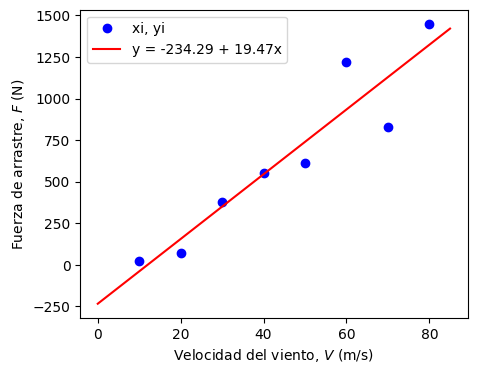

In [19]:
import matplotlib.pyplot as plt

# formato del lienzo
plt.rcParams.update({'font.size': 10}) # tamaño de fuente
plt.figure(figsize = (5,4))            # tamaño del lienzo

# ploteamos nuestro resultado
y = lambda x: a[0] + a[1]*x # creamos una función con el modelo de ajuste
x = np.linspace(0,85,100)   # creamos un arreglo para ploteo

plt.plot(xi, yi, 'ob',label = 'xi, yi')                             # gráfico con los datos tabulados
plt.plot(x, y(x), '-r', label = 'y = %.2f + %.2fx' % (a[0], a[1]))  # gráfico del modelo
plt.xlabel('Velocidad del viento, $V$ (m/s)')                       # etiqueta eje x
plt.ylabel('Fuerza de arrastre, $F$ (N)')                           # etiqueta eje y
plt.legend()                                                        # incluir leyenda
plt.show()                                                          # mostrar gráfico

### Cuantificación del error

Para cuantificar la calidad de nuestro modelo utilizaremos el **coeficiente de determinación, $r^2$:**

\begin{equation}
r^2 = \frac{S_t - S_r}{S_t}
\end{equation}

donde
- $S_r =  \sum\left[y_i - y(x_i)\right]^2$ es el error del modelo de regresión ($y(x) = a_0 + a_1x$, en este caso)

- $S_t = \sum\left(y_i - \bar{y}\right)^2$ es la desviación estandar de los datos respecto a la media $\bar{y}$.

>El coeficiente de determinación nos permite cuantificar la calidad de nuestro modelo para representar una muestra, en comparación con la media $\bar{y}$.

En python este valor está dado por la función `r2_score` de la librería `scikit-learn`

In [3]:
from sklearn.metrics import r2_score 
print('coef. de determinación')
print('r2 = %.4f' % r2_score(yi,y(xi)))

coef. de determinación
r2 = 0.8805


> El resultado indica que el modelo lineal explica un 88.05% de los datos

>**Nota.** `r2_score(yi,y(xi)))` requiere dos arreglos de iguales dimensiones. 

### Linealización de funciones no lineales
Existen algúunos modelos no lineales comunes en ingeniería que pueden ser linealizados para luego realizar ajuste por mínimos cuadrados.

Algúnos ejemplos son:
- **modelo exponencial**

\begin{equation*}
y = \alpha e^{\beta x} \Rightarrow \ln(y) = \ln(\alpha) + \beta x
\end{equation*}

- **modelo de potencia**

\begin{equation*}
y = \alpha x^{\beta} \Rightarrow \log(y) = \log(\alpha) + \beta \log (x)
\end{equation*}

- **modelo de tasa de crecimiento de saturación**

\begin{equation*}
y = \alpha \frac{x}{\beta + x} \Rightarrow 
\frac{1}{y} = \frac{1}{\alpha} +\frac{\beta}{\alpha}\frac{1}{x}
\end{equation*}

<img src="./images/linealization.png" width="800" align= center>

> **Nota** Para el modelo de potencia, podemos usar "$\log$" o "$\ln$" para linealizar, tomando la precaución de usar la función inversa correcta para recuperar el modelo original, es decir:
    \begin{align*}
    y &= 10^{\log \alpha + \beta\log x}\quad\mathrm{o,}\\
    y &= e^{\ln \alpha + \beta\ln x}
    \end{align*}

> **Los coeficientes del modelo linealizado serán diferentes** dependiendo de si se usa "$\log$" o "$\ln$". **Sin embargo, el modelo original debe ser el mismo**, independientemente de la función utilizada para la linealización.

Analicemos el ejemplo anterior, ahora ajustando los datos al modelo de potencia $y = \alpha x^{\beta}$

Primero, aplicaremos un modelo de ajuste de la forma: $\ln(y) = a_0 + a_1\ln(x)$.

In [4]:
import numpy as np
from numpy import log # en python log(x) = ln(x)
xi = np.array([ 10, 20,  30,  40,  50,   60,  70,  80])
yi = np.array([ 25, 70, 380, 550, 610, 1220, 830, 1450])

# linealizamos las variables
log_xi = log(xi)
log_yi = log(yi)

# construimos un sistema Ax = b
m = len(xi)   # numero de datos
A = np.array([[   m          ,  np.sum(log_xi)  ],
              [np.sum(log_xi), np.sum(log_xi**2)]])

b = np.array([np.sum(log_yi),
              np.sum(log_yi*log_xi)])

# resolvemos el sistema
a = np.linalg.solve(A,b) 
print('Modelo linealizado: \n ln(y) = %.3f + %.3f*ln(x)' 
      % (a[0], a[1]))

Modelo linealizado: 
 ln(y) = -1.294 + 1.984*ln(x)


Para retornar al modelo original, aplicamos

\begin{equation*}
y = e^{\left(a_0+a_1\ln x\right)} = e^{a_0} x^{a_1} = \alpha x ^\beta
\end{equation*}

donde deducimos que $\alpha = e^{a_0}$ y $\beta = a_1$.

In [5]:
alpha = np.exp(a[0])
beta  = a[1]

print('Modelo no-lineal')
print('y = %.3f*x^%.3f' % (alpha, beta))

Modelo no-lineal
y = 0.274*x^1.984


Graficamos el resultado con el modelo no-lineal $y = \alpha x^{\beta}$

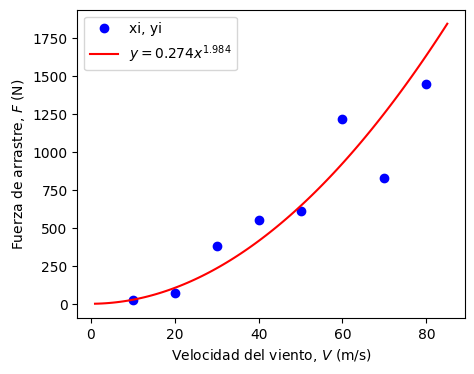

In [6]:
# formato del lienzo
plt.rcParams.update({'font.size': 10}) # tamaño de fuente
plt.figure(figsize = (5,4))            # tamaño del lienzo

# ploteamos nuestro resultado)
y = lambda x: alpha*x**beta     # función con el modelo no-lineal
x = np.linspace(1,85,100)       # creamos un arreglo para ploteo

plt.plot(xi, yi, 'bo',label = 'xi, yi')                                 # gráfico con los datos tabulados
plt.plot(x, y(x), '-r', label = r'$y = %.3fx^{%.3f}$' % (alpha, beta))  # gráfico del modelo
plt.xlabel('Velocidad del viento, $V$ (m/s)')                           # etiqueta eje x
plt.ylabel('Fuerza de arrastre, $F$ (N)')                               # etiqueta eje y
plt.legend()                                                            # incluir leyenda
plt.show()                                                              # mostrar gráfico

Analizamos la calidad del modelo

In [7]:
# analizamos la calidad del modelo
from sklearn.metrics import r2_score 

print('coef. de determinación')
print('r2 = %.4f' % r2_score(yi,y(xi)))

coef. de determinación
r2 = 0.8088


> El resultado indica que el modelo lineal explica un 80.88% de los datos

El coeficiente de determinación para el modelo no-lineal ($r^2=80.88\%$) es menor que para el modelo lineal ($r^2=88.05\%$). Sin embargo, el modelo no-lineal se ajusta mejor al modelo físico (por ejemplo, $F = 0$ para $v = 0$).

Por lo tanto, el modelo más adecuado para los datos es el de potencia:

\begin{equation*}
y = 0.274 x^{1.984},
\end{equation*}

## Otros modelos lineales
El procedimiento de ajuste de curva por mínimos cuadrados se puede extender para modelos de ajuste más complejos, tales como:
- Regresión polinomial
- Regresión lineal multivariable

### Regresión polinomial
En su forma general, el modelo polinomial corresponde a una función univariable de la forma

\begin{equation}
y = a_0 + a_1x + a_2x^2+a_3x^3+... a_n x^n 
\end{equation}

Por ejemplo, consideremos el modelo $y = a_0 + a_1 x + a_2 x^2$. Según el método de regresión por mínimos cuadrados, la mejor curva está dada por el mínimo de:
\begin{equation*}
S_r = \sum_{i=1}^m \left(y_i - a_0 - a_1 x_i - a_2 x_i^2\right)^2,
\end{equation*}

Aplicando $\frac{\partial S_r}{\partial a_0} =0$, $\frac{\partial S_r}{\partial a_1} =0$ y $\frac{\partial S_r}{\partial a_2} =0$, llegamos al sistema de ecuaciones:

\begin{equation*}
\begin{bmatrix}
     m     & \sum x_i   & \sum x_i^2 \\
\sum x_i   & \sum x_i^2 & \sum x_i^3 \\
\sum x_i^2 & \sum x_i^3 & \sum x_i^4 \\
\end{bmatrix}
\left[\begin{array}{c} a_0 \\a_1\\a_2\end{array}\right] =
\left[\begin{array}{c} \sum y_i \\\sum x_iy_i\\\sum x_i^2y_i \end{array}\right]
\end{equation*}

Cuya solución nos entrega el valor de los coeficientes $a_0$, $a_1$ y $a_2$

### Regresión lineal multidimensional
Para problemas con más de una variable independiente se deben untilizar modelos multidimensionales. Un modelo común corresponde al modelo lineal de la forma:

\begin{equation}
y = a_0 + a_1x_1 + a_2x_2+a_3x_3+... a_n x_n 
\end{equation}

Por ejemplo, en dos dimensiones tenemos un modelo de la forma $y = a_0 + a_1x_1+a_2x_2$. La mejor curva está dada por el mínimo de:
\begin{equation*}
S_r = \sum_{i=1}^m \left(y_i - a_0 - a_1x_{1,i}+a_2x_{2,i}\right)^2,
\end{equation*}

Aplicando $\frac{\partial S_r}{\partial a_0} =0$, $\frac{\partial S_r}{\partial a_1} =0$ y $\frac{\partial S_r}{\partial a_2} =0$, llegamos al sistema de ecuaciones:

\begin{equation*}
\begin{bmatrix}
     m       & \sum x_{1,i}        & \sum x_{2,i} \\
\sum x_{1,i} & \sum x_{2,i}        & \sum x_{1,i}x_{2,i} \\
\sum x_{2,i} & \sum x_{1,i}x_{2,i} & \sum x_{2,i}^2 \\
\end{bmatrix}
\left[\begin{array}{c} a_0 \\a_1\\a_2\end{array}\right] =
\left[\begin{array}{c} \sum y_i \\\sum x_{1,i}y_i\\\sum x_{2,i}y_i \end{array}\right]
\end{equation*}

Cuya solución nos entrega el valor de los coeficientes $a_0$, $a_1$ y $a_2$

Gráficamente, el método de regresión por mínimos cuadrados corresponde a determinar el plano que minimice el error cuadrático.

<img src="./images/2D_plane.png" width="800" align= center>

## Modelos de ajuste en python

Es importante mencionar que en materia de modelos de ajuste la librería más adecuada es `scikit-learn`. La librería, sin embargo, puede ser demasiado compleja para modelos lineales simples. 

En este capítulo, mostraremos los métodos más simples para regresión lineal polinomial y no-lineal, utilizando `numpy` y `scipy`.

### Modelo polinomial unidimencional (`numpy.polyfit`)
Esta función está especificamente diseñada para modelos polinomiales de una dimensión, es decir, $y = a_0 + a_1x +a_2x^2+...a_nx^n$

Por ejemplo, para generar un modelo en base a un polinomio de orden 2, 
```python
a = numpy.polyfit(xi,yi,2) # coeficientes a0, a1, a2, ...
```
donde $a_0=$ `a[2]`, $a_1=$ `a[1]`, $a_2=$ `a[0]`

Tal como indica la [documentación oficial](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html), **los coeficientes de `polyfit` están ordenados de mayor potencia a menor potencia.** 

<img src="./images/polyfit_doc.png" width="800" align= center>

Para evitar confusiones con el orden de los coeficientes, **se recomienda utilizar `numpy.polyval(a,x)`, que genera una función en base al modelo determinado**, donde `x` es un valor arbitrario y `a` son los coeficientes determinados por `polyfit`.
```python
y = numpy.polyval(a,x) # función en base al modelo y(x) = a0 + a1*x + ... am*x^m
```

Analicemos el uso de `polyfit` y `polyval` con el ejemplo del tunel de viento

In [8]:
import numpy as np

# construimos el modelo
xi = np.array([ 10, 20,  30,  40,  50,   60,  70,  80])
yi = np.array([ 25, 70, 380, 550, 610, 1220, 830, 1450])

# Aplicamos modelo polinomial con polyfit
a = np.polyfit(xi,yi,2)
print('Modelo polinomial:')
print('y = %.3f + %.3f*x + %.3f*x^2' % (a[2], a[1], a[0]))

# evaluamos polinomio de ajuste con polyval
x0 = 34 # valor de prueba
print('y(%.3f) = %.3f'% (x0,np.polyval(a,x0)))

Modelo polinomial:
y = -178.482 + 16.122*x + 0.037*x^2
y(34.000) = 412.673


Graficamos la solución con `polyval`:

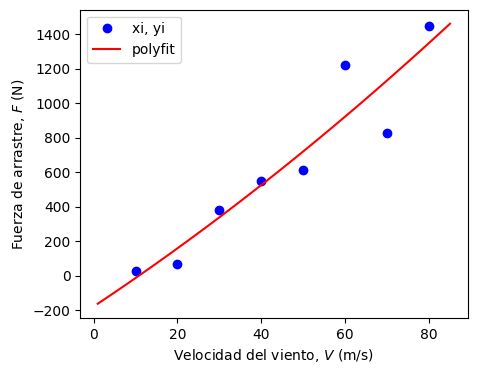

In [9]:
# formato del lienzo
plt.rcParams.update({'font.size': 10}) # tamaño de fuente
plt.figure(figsize = (5,4))            # tamaño del lienzo

# ploteamos nuestro resultado)
x = np.linspace(1,85,100)       # creamos un arreglo para ploteo

plt.plot(xi, yi, 'bo',label = 'xi, yi')                # gráfico con los datos tabulados
plt.plot(x, np.polyval(a,x), '-r', label = 'polyfit')  # gráfico del modelo
plt.xlabel('Velocidad del viento, $V$ (m/s)')          # etiqueta eje x
plt.ylabel('Fuerza de arrastre, $F$ (N)')              # etiqueta eje y
plt.legend()                                           # incluir leyenda
plt.show()                                             # mostrar gráfico

In [10]:
# analizamos la calidad del modelo
from sklearn.metrics import r2_score 

print('coef. de determinación')
print('r2 = %.4f' % r2_score(yi,np.polyval(a,xi)))

coef. de determinación
r2 = 0.8818


Notar que el gráfico del modelo muestra una tendencia aproximadamente lineal.

Esto es interesante, porque al incluir término $a_2x^2$ en nuestro modelo lineal, $a_0 + a_1x$, esperabamos un mejor ajuste con el modelo físico $F_D = \frac{1}{2}\rho A C_D V^2$.

Sin embargo, **la tendencia del método es minimizar el error (en otras palabras, mejorar $r^2$).** Esto significa que el método va a forzar una curva lineal, aunque esta no corresponda a la física del problema.

### `scipy.optimize.curve_fit` (regresión no-lineal)
Esta función, parte del módulo `optimize` de la librería `scipy`, **utiliza un método iterativo para minimizar el error cuadrático**. La función `curve_fit` puede ser utilizada para cualquier tipo de modelo, linear o no-linear, unidimensional o multidimensional.

> **Nota** Para más información de `curve_fit`, revisar [documentación en línea](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html)

Para usar `curve_fit` primero debemos crear el modelo de ajuste en formato de función, por ejemplo para $y = \alpha x^\beta$:
```python
def model(x,a,b):
    y = a*x**b
    return y
```

> El primer argumento de la función `x`, *siempre debe ser la variable independiente*. Los parámetros de ajuste, `a,b` van indicados en los argumentos siguientes.

Luego, llamamos a `curve_fit` usando el modelo de ajuste y la serie de datos $x_i, y_i$, como argumentos:
``` python
coef = curve_fit(model, xdata = xi, ydata = yi)[0]
a = coef[0] # parámetro alfa
b = coef[1] # parámetro beta
```

> El índice `[0]` al final de `curve_fit` indica que necesitamos solo el primer *output*, el cual llamamos `coef`. Esta variable viene en formato de arreglo numpy (*ndarray*), donde el orden de los coeficientes corresponde al orden de `a` y `b` en `model`.

Por ejemplo, ajustemos los datos al modelo $y=\alpha x^\beta$

In [11]:
import numpy as np
from scipy.optimize import curve_fit

xi = np.array([ 10, 20,  30,  40,  50,   60,  70,  80])
yi = np.array([ 25, 70, 380, 550, 610, 1220, 830, 1450])

# creamos nuestro modelo de ajuste en formato de función
def model(x,a,b):
    y = a*x**b
    return y

# usamos curve_firt para determinar el valor de los parámetros a y b
coef = curve_fit(model, xdata = xi, ydata = yi)[0] # extraemo|s el primer output del modelo
a = coef[0] # parámetro alfa
b = coef[1] # parámetro beta

print('Modelo no-lineal')
print('y = %.3f*x^%.3f' % (a, b))

Modelo no-lineal
y = 2.538*x^1.436


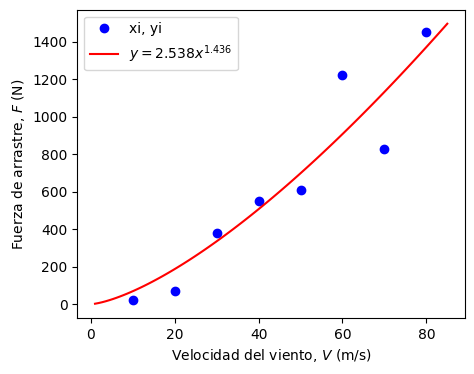

In [12]:
# formato del lienzo
plt.rcParams.update({'font.size': 10}) # tamaño de fuente
plt.figure(figsize = (5,4))            # tamaño del lienzo

# ploteamos nuestro resultad)
x = np.linspace(1,85,100)       # creamos un arreglo para ploteo

plt.plot(xi, yi, 'bo',label = 'xi, yi')                                 # gráfico con los datos tabulados
plt.plot(x, model(x,a,b), '-r', label = r'$y = %.3fx^{%.3f}$' % (a, b)) # gráfico del modelo
plt.xlabel('Velocidad del viento, $V$ (m/s)')                           # etiqueta eje x
plt.ylabel('Fuerza de arrastre, $F$ (N)')                               # etiqueta eje y
plt.legend()                                                            # incluir leyenda
plt.show()                                                              # mostrar gráfico

Notar que los coeficientes de este modelo son diferentes a los que determinamos mediante regresión lineal en la función linealizada.

\begin{equation*}
y = 0.274x^{1.984}\quad\left(r^2=80.88\%\right)
\end{equation*}

Esto es debido a que la regresión no-lineal busca minimizar el error

\begin{equation*}
S_r = \sum_{i=1}^m (f_\mathrm{nl}(x_i) - y_i)^2,
\end{equation*}

de forma iterativa. 

Así, `curve_fit` permite buscar soluciones con valores $r^2$ más cercanos a $1$ que no son accesibles para el modelo lineal

En efecto, si analizamos el coeficiente de determinación del modelo generado por `curve_fit`:

In [13]:
from sklearn.metrics import r2_score 
print('coef. de determinación')
print('r2 = %.4f' % r2_score(yi,model(xi,a,b)))

coef. de determinación
r2 = 0.8769


En el caso de un modelo lineal, ambos métodos generan el mismo modelo

In [14]:
import numpy as np
from scipy.optimize import curve_fit

xi = np.array([ 10, 20,  30,  40,  50,   60,  70,  80])
yi = np.array([ 25, 70, 380, 550, 610, 1220, 830, 1450])

def model(x,a,b):
    y = a+ b*x
    return y

coef = curve_fit(model, xdata = xi, ydata = yi)[0]
print('Modelo lineal: y = %.3f + %.3f*x' % (coef[0], coef[1]))

Modelo lineal: y = -234.286 + 19.470*x


## Regresión lineal vs no-lineal

Respecto a la regresión no-lineal:

**Ventajas**
- Permite trabajar con modelos más generales. 
- Para modelos no-lineales, el método produce curvas con mejores coeficientes de determinación en comparación con modelos lineales en base a linealización.

**Desventajas**
- Como todo método iterativo, el metodo puede sufrir problemas de inestabilidad condicionados al modelo propuesto, $f_\mathrm{nl}(x)$. Esto puede derivar en problemas de convergencia, soluciones locales, o sensibilidad a los valorse iniciales.

>En general, se recomienda **utilizar `scipy.optimize.curve_fit`**, u otros métodos de ajuste no-lineal, **exclusivamente para modelos no-lineales**. 

## Referencias
- Kong Q., Siauw T., Bayen A. M. **Chapter 16: Least Square Regression** in *[Python Programming and Numerical Methods – A Guide for Engineers and Scientists](https://pythonnumericalmethods.berkeley.edu/notebooks/Index.html)*, 1st Ed., Academic Press, 2021

- Chapra S., Canale R. **Capítulo 17: Regresión por mínimos cuadrados** en *Métodos Numéricos para Ingenieros*, 6ta Ed., McGraw Hill, 2011